Let's start by importing some libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import sys
sys.path.append("..")

# Genetic Algorithm

We'll start using the Genetic Algorithm. First, we need to import it.

In [2]:
from evolpy import GA

### Sphere Function

Next, we need to define what will be the fitness function to be minimized.

We'll begin by an easy one, the Sphere Function [1].

$$
f(x_1, x_2, ..., x_n) = \sum_{i=1}^{n} x_i^2,
$$
subject to $0 \leq x_i \leq 10$.

Plot:

![Source: BenchmarkFcns](http://benchmarkfcns.xyz/benchmarkfcns/plots/spherefcn.png "Source: BenchmarkFcns")

The global minima is located at $x^* = (0, 0, ..., 0), f(x^*) = 0$.

[1] M. A. Schumer, K. Steiglitz, “Adaptive Step Size Random Search,” IEEE Transactions
on Automatic Control. vol. 13, no. 3, pp. 270-276, 1968.

It can be easily represented using NumPy:

In [3]:
def sphere(individual):
    return np.square(individual).sum()

To represent the parameters, we'll use an OrderedDict, since it records the insertion order. We'll create a dictionary where each key is a $x_i$ and the value is a tuple of the bounds (0, 10). Our problem will have 5 dimensions.

In [4]:
parameters = OrderedDict([(f'x{i}', (0,10)) for i in range(5)])

Having all this, we can instantiate the evolver. We'll use a population size of 25 and the maximum number of generations will be 500.

In [5]:
evolver = GA(fitness=sphere, parameters=parameters, populationSize=25, maxGen=1000)

Next, we just need to call the evolver's function `run`. It will return two elements: 
1. The best individual. It will be returned as a dictionary containing the values of each dimension and the fitness of the best individual.
1. The history of fitness values as a list.

In [6]:
best_individual, fitness_history = evolver.run()

We can see the best individual information:

In [7]:
print(*best_individual['gene'].items(), sep='\n')

print('\nFitness: {}'.format(best_individual['fitness']))

('x0', 0.11842066304851184)
('x1', 0.015)
('x2', 0.18937681760768377)
('x3', 0.516)
('x4', 0.6306369941198509)

Fitness: 0.714071050836584


Plotting the fitness history.

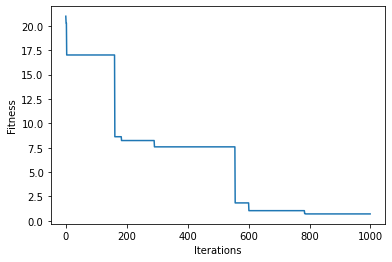

In [8]:
plt.plot(fitness_history)
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.show()